<a href="https://colab.research.google.com/github/Onyx-B12/Vehicle-Guidance-Theory/blob/main/Vehicle_Guidance_Theory_HW02_22211645_%EB%B0%95%EA%B7%9C%EB%B9%88.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Vehicle Guidance Theory HW02 : LQR example via Dynamic Programming**


---



**ASE7005 Vehicle Guidance Theory, 04-01-2021**

*22211645 박규빈 (22211645@inha.edu)*

---

## **LQR Problem via Least Square**

### **Formulating Block Toeplitz Matrix**

다음과 같은 이산화된 선형 시스템을 생각하자.

$$
x_{t+1}=Ax_t+Bu_t
$$

이를 풀어 쓰면 다음과 같다.

$$
\begin{aligned}
x_0=&x_0\\
x_1=&Ax_0+Bu_0\\
x_2=&A^2x_0+ABu_0+Bu_1\\
x_3=&A^3x_0+A^2Bu_0+ABu_1+Bu_2\\
\\&\vdots\\
x_N=&A^Nx_0+\begin{bmatrix}A^{N-1}B&A^{N-2}B&\dotsm&AB&B\end{bmatrix}\begin{bmatrix}u_0\\u_1\\\vdots\\n_{N-1}\end{bmatrix}
\end{aligned}
$$

위 식을 행렬로 표현하면 아래와 같으며,

$$
X=GU+Hx_0
$$

여기서 $G,~ X,~ H,~ U$은 다음과 같다.

$$
G=\begin{bmatrix}0&0&\dotsm&0\\B&0&\dotsm&0\\AB&B&\dotsm&0\\\vdots&\ddots&\ddots&\vdots\\A^{N-1}B&\dotsm&AB&B\end{bmatrix}, 
~X=\begin{bmatrix}x_0\\x_1\\\vdots\\x_N\end{bmatrix},
~H=\begin{bmatrix}I\\A\\\vdots\\A^N\end{bmatrix},
~U=\begin{bmatrix}u_0\\u_1\\\vdots\\u_{N-1}\end{bmatrix}
$$


### **Quadratic Cost Function**

이제 quadratic cost function $J(U)$을 다음과 같이 정의하자.

$$
J(U) = \sum_{i=0}^{N-1} (u_i^T{R}u_i+x_i^T{Q}x_i)+x_N^T{Q_f}x_N
$$

여기서 $u^TRu$은 제어 입력에 따른 cost를, $x^TQx$은 상태변수에 의한 cost를 의미하며, $Q,~ Q_f$은 symmetric positive semi-definite matrix, $R$은 symmetric positive definite matrix이다(${{\it i.e.}}~Q = Q^T \succeq 0,~ Q_f = Q_f^T \succeq 0,~ R = R^T \succ 0$).

$Q,~ Q_f,~ R$의 모든 eigenvalue가 음수가 아니므로, 이들을 eigendecomposition해 얻은 $Q^\frac{1}{2},~ Q_f^\frac{1}{2},~ R^\frac{1}{2}$을 이용해 $J(U)$을 다시 쓸 수 있다.

$$
\begin{aligned}
J(U) &= \sum_{i=0}^{N-1} (u_i^T{R}u_i+x_i^T{Q}x_i)+x_N^T{Q_f}x_N\\
&=\begin{bmatrix}x_0^T&\dotsm&x_N^T\end{bmatrix}\begin{bmatrix}Q&\dotsm&0&0\\\vdots&\ddots&\vdots&\vdots\\0&\dotsm&Q&0\\0&\dotsm&0&Q_f\end{bmatrix}\begin{bmatrix}x_0\\\vdots\\x_N\end{bmatrix}
+\begin{bmatrix}u_0^T&\dotsm&u_{N-1}^T\end{bmatrix}\begin{bmatrix}R&\dotsm&0\\\vdots&\ddots&\vdots\\0&\dotsm&R\end{bmatrix}\begin{bmatrix}u_0\\\vdots\\u_{N-1}\end{bmatrix}\\
&=\left\lVert\begin{bmatrix}Q^\frac{1}{2}&\dotsm&0\\\vdots&\ddots&\vdots\\0&\dotsm&Q_f^\frac{1}{2}\end{bmatrix}\begin{bmatrix}x_0\\\vdots\\x_N\end{bmatrix}\right\rVert_2^2+\left\lVert\begin{bmatrix}R^\frac{1}{2}&\dotsm&0\\\vdots&\ddots&\vdots\\0&\dotsm&R^\frac{1}{2}\end{bmatrix}\begin{bmatrix}u_0\\\vdots\\u_{N-1}\end{bmatrix}\right\rVert_2^2\\
&=\left\lVert{\text{diag}(Q^\frac{1}{2}, \dotsm , Q_f^\frac{1}{2})(GU+Hx_0)}\right\rVert_2^2+\left\lVert{\text{diag}(R^\frac{1}{2}, \dotsm , R^\frac{1}{2})U}\right\rVert_2^2\\
&=\left\lVert{\tilde{A}U+\tilde{b}}\right\rVert_2^2+\left\lVert{\tilde{C}U}\right\rVert_2^2\\
&=\left\lVert\begin{bmatrix}{\tilde{A}U+\tilde{b}}\\\tilde{C}U\end{bmatrix}\right\rVert_2^2\\
&=\left\lVert\begin{bmatrix}\tilde{A}\\\tilde{C}\end{bmatrix}U+\begin{bmatrix}\tilde{b}\\0\end{bmatrix}\right\rVert_2^2\\
&=\left\lVert\bar{A}U+\bar{b}\right\rVert_2^2\\
\end{aligned}
$$

여기서 $\tilde{A},~ \tilde{b},~ \tilde{C},~ \bar{A},~ \bar{b}$은 다음과 같다.

$$
\begin{aligned}
\tilde{A}&=\text{diag}(Q^\frac{1}{2}, \dotsm , Q_f^\frac{1}{2})G=\begin{bmatrix}0&0&\dotsm&0\\Q^\frac{1}{2}B&0&\dotsm&0\\Q^\frac{1}{2}AB&Q^\frac{1}{2}B&\dotsm&0\\\vdots&\ddots&\ddots&\vdots\\Q_f^\frac{1}{2}A^{N-1}B&\dotsm&Q_f^\frac{1}{2}AB&Q_f^\frac{1}{2}B\end{bmatrix},\\
\tilde{b}&=\text{diag}(Q^\frac{1}{2}, \dotsm , Q_f^\frac{1}{2})Hx_0=\begin{bmatrix}Q^\frac{1}{2}\\Q^\frac{1}{2}A\\\vdots\\Q_f^\frac{1}{2}A^N\end{bmatrix}x_0,\\
\tilde{C}&=\text{diag}(R^\frac{1}{2}, \dotsm , R^\frac{1}{2})=\begin{bmatrix}R^\frac{1}{2}&\dotsm&0\\\vdots&\ddots&\vdots\\0&\dotsm&R^\frac{1}{2}\end{bmatrix},\\
\bar{A}&=\begin{bmatrix}\tilde{A}\\\tilde{C}\end{bmatrix},\\
\bar{b}&=\begin{bmatrix}\tilde{b}\\\tilde{0}\end{bmatrix}
\end{aligned}
$$

### **Solving Least Square Problem**

이렇게 $J(U)$을 least square 형태로 변환시켰다.

$$
  \underset{U}{\text{minimize}} \quad \|\bar{A}U+\bar{b}\|_2^2
$$

이 문제에서 $\bar{A}$은 tall한 형태이므로, $\bar{A}^T\bar{A}$의 역행렬이 존재한다면(${\it i.e.}~\bar{A}^T\bar{A} \succ 0$) 그 유일한 최적해 $U^*$은 $-\bar{A}^\dagger\bar{b}$로 나타내어짐이 알려져 있다. 여기서 $\bar{A}^\dagger$은 $\bar{A}$의 Moore-Penrose pseudoinverse matrix을 의미한다(${\it i.e.}~\bar{A}^\dagger = (\bar{A}^T\bar{A})^{-1}\bar{A}^T$).

증명을 위해 Schur complement matrix을 이용하자. 일반화된 함수 $V(x, y)$을 다음과 같이 나타낼 수 있다고 가정한다.

$$
\begin{aligned}
V(x, y) &=  \begin{bmatrix}x\\y\end{bmatrix}^T\begin{bmatrix}A&B\\B^T&C\end{bmatrix}\begin{bmatrix}x\\y\end{bmatrix}\\
&= x^TAx + y^TB^Ty + x^TBy + y^TCy\\
&= x^TAx + 2y^TB^Ty + y^TCy\\
\end{aligned}
$$

만약 $A \succ 0$이면, 즉 $A$의 역행렬이 존재한다면 다음이 성립한다.

$$
\begin{aligned}
V(x, y) &= x^TAx + 2y^TB^Ty + y^TCy + (y^TB^TA^{-1}By - y^TB^TA^{-1}By)\\
&= (x^TAx + 2y^TB^Ty + y^TB^TA^{-1}By) + (y^TCy - y^TB^TA^{-1}By)\\
&= (x + A^{-1}By)^TA(x + A^{-1}By) + y^T(C - B^TA^{-1}B)y
\end{aligned}
$$

이러한 $V(x, y)$은 첫 번째 항이 0일 때 최소가 되며, ${\it i.e.}~ x + A^{-1}By = 0$, 그 때의 $x$와 $V$는 아래와 같이 쓸 수 있다.

$$
\begin{aligned}
x^* &= \underset{x}{\text{argmin}}~ V(x, y) = -A^{-1}By\\
V^* &= \underset{x}{\text{min}}~ V(x, y) = y^T(C - B^TA^{-1}B)y
\end{aligned}
$$

이때 $V^*$의 $C - B^TA^{-1}B$을 블록행렬 $\begin{bmatrix}A&B\\B^T&C\end{bmatrix}$의 Schur complement matrix라 하며, 그 positive definiteness는 기존 블록행렬과 동일하다.

이를 least square problem에 적용하면,

$$
\begin{aligned}
V(x) &= \|Ax+b\|_2^2\\
&= (Ax+b)^T(Ax+b)\\
&= x^TA^TAx + b^TAx + x^TA^Tb + b^Tb\\
&= x^TA^TAx + 2b^TAx + b^Tb\\
&= \begin{bmatrix}x\\1\end{bmatrix}^T\begin{bmatrix}A^TA&A^Tb\\b^TA&b^Tb\end{bmatrix}\begin{bmatrix}x\\1\end{bmatrix}\\
\end{aligned}
$$

따라서 least square problem의 최적해 $x^*$은 아래와 같으며,

$$
x^* = -(A^TA)^{-1}A^Tb = -A^{\dagger}b
$$

이에 따른 최적값 $V^*$은 다음과 같다.

$$
V^* = b^Tb - b^TA(A^TA)^{-1}A^Tb
$$

### **Extra : Least Square in Quadratic Form**

$J(U)$을 기존의 least square form 대신 quadratic form으로 나타내어도 동일한 최적해를 얻을 수 있음을 보일 것이다.

$$
\begin{aligned}
J(U) &= \left\lVert{\tilde{A}U+\tilde{b}}\right\rVert_2^2+\left\lVert{\tilde{C}U}\right\rVert_2^2\\
&= (x^T\tilde{A}^T\tilde{A}x + \tilde{b}^T\tilde{b} + 2\tilde{b}^T\tilde{A}U) + (U^T\tilde{C}^T\tilde{C}U)\\
&= U^T(\tilde{A}^T\tilde{A} + \tilde{C}^T\tilde{C})U + 2\tilde{b}^T\tilde{A}U + \tilde{b}^T\tilde{b}\\
&= \begin{bmatrix}U\\1\end{bmatrix}^T\begin{bmatrix}\tilde{A}^T\tilde{A} + \tilde{C}^T\tilde{C}&\tilde{A}^T\tilde{b}\\\tilde{b}^T\tilde{A}&\tilde{b}^T\tilde{b}\end{bmatrix}\begin{bmatrix}U\\1\end{bmatrix}
\end{aligned}
$$

따라서, quadratic form으로 얻은 최적해 $U_{quad}^*$이

$$
U_{quad}^* = -(\tilde{A}^T\tilde{A} + \tilde{C}^T\tilde{C})^{-1}\tilde{A}^T\tilde{b}
$$

기존 least square form으로 얻은 최적해 $U_{lsq}^*$와 동일함을 보일 수 있다.
$$
\begin{aligned}
U_{lsq}^* &= -(\bar{A}^T\bar{A})^{-1}\bar{A}^T\bar{b}\\
&= -\begin{pmatrix}\begin{bmatrix}\tilde{A}^T&\tilde{C}^T\end{bmatrix}\begin{bmatrix}\tilde{A}\\\tilde{C}\end{bmatrix}\end{pmatrix}^{-1}\begin{bmatrix}\tilde{A}^T&\tilde{C}^T\end{bmatrix}\begin{bmatrix}\tilde{b}^T\\0\end{bmatrix}\\
&= -(\tilde{A}^T\tilde{A} + \tilde{C}^T\tilde{C})^{-1}\tilde{A}^T\tilde{b}\\
&= U_{quad}^*
\end{aligned}
$$


---



## **LQR Problem via Dynamic Programming**

### **Value Function**

다음과 같은 이산화된 선형 시스템을 생각하자.

$$
x_{t+1}=Ax_t+Bu_t
$$

시간 $t$에서 시스템의 상태 $x_t$에 의한 value function $V(x_t)$을 $x_t^TP_tx_t$로 나타낼 수 있다고 가정한 뒤, 다음과 같이 정의한다.

(단, $P_t = P_t^T \succeq 0$)

$$
\begin{aligned}
V(x_t) &= x_t^TP_tx_t\\
&= \underset{u_t, ~\dotsm~, u_{N-1}}{\text{min}} \begin{Bmatrix}\displaystyle\sum_{\tau=t}^{N-1}(x_\tau^TQx_\tau + u_\tau^TRu_\tau) + x_N^TQ_fx_N\end{Bmatrix}\\
&= \underset{u_t, ~\dotsm~, u_{N-1}}{\text{min}} \begin{Bmatrix}(x_t^TQx_t + u_t^TRu_t) + \displaystyle\sum_{\tau=t + 1}^{N-1}(x_\tau^TQx_\tau + u_\tau^TRu_\tau) + x_N^TQ_fx_N\end{Bmatrix}\\
&= \underset{u_t}{\text{min}} ~\begin{Bmatrix}x_t^TQx_t + u_t^TRu_t + \underset{u_{t+1}, ~\dotsm~, u_{N-1}}{\text{min}}\begin{Bmatrix}\displaystyle\sum_{\tau=t + 1}^{N-1}(x_\tau^TQx_\tau + u_\tau^TRu_\tau) + x_N^TQ_fx_N\end{Bmatrix}\end{Bmatrix}\\
&= \underset{u_t}{\text{min}} ~\begin{Bmatrix}x_t^TQx_t + u_t^TRu_t + V(x_{t+1})\end{Bmatrix}\\
&= \underset{u_t}{\text{min}} ~\begin{Bmatrix}x_t^TQx_t + u_t^TRu_t + V(Ax_t + Bu_t)\end{Bmatrix}
\end{aligned}
$$

이렇게 정리된 $V(x_t)$을 dynamic programming principle 또는 Hamilton-Jacobi equation이라 한다.
위 식 중 $x_t^TQx_t$는 control input $u_t$를 이용해 최소화시킬 수 없으므로, 최적해 $u_t^*$을 다음과 같이 나타낼 수 있다.

$$
u_t^* = \underset{u_t}{\text{argmin}} \begin{pmatrix}u_t^TRu_t + V(Ax_t+Bu_t)\end{pmatrix}
$$

이제 $V(Ax_t+Bu_t)$을 $x_{t+1}^TP_{t+1}x_{t+1}$의 형태로 나타낼 수 있다고 가정하자.

(단, $P_{t+1} = P_{t+1}^T \succeq 0$)

$$
\begin{aligned}
V(x_t) &= x_t^TQx_t + \underset{u_t}{\text{min}} ~\begin{Bmatrix}u_t^TRu_t + V(Ax_t + Bu_t)\end{Bmatrix}\\
&= x_t^TQx_t + \underset{u_t}{\text{min}} ~\begin{Bmatrix}u_t^TRu_t + x_{t+1}^TP_{t+1}x_{t+1}\end{Bmatrix}\\
&= x_t^TQx_t + \underset{u_t}{\text{min}} ~\begin{Bmatrix}u_t^TRu_t + (Ax_t+Bu_t)^TP_{t+1}(Ax_t+Bu_t)\end{Bmatrix}\\
&= x_t^TQx_t + \underset{u_t}{\text{min}} ~\begin{Bmatrix}u_t^TRu_t + \begin{bmatrix}u_t\\x_t\end{bmatrix}^T\begin{bmatrix}B&A\end{bmatrix}^TP_{t+1}\begin{bmatrix}B&A\end{bmatrix}\begin{bmatrix}u_t\\x_t\end{bmatrix}\end{Bmatrix}\\
&= x_t^TQx_t + \underset{u_t}{\text{min}} ~\begin{Bmatrix}u_t^TRu_t + \begin{bmatrix}u_t\\x_t\end{bmatrix}^T\begin{bmatrix}B^TP_{t+1}B&B^TP_{t+1}A\\A^TP_{t+1}B&A^TP_{t+1}A\end{bmatrix}\begin{bmatrix}u_t\\x_t\end{bmatrix}\end{Bmatrix}\\
&= x_t^TQx_t + \underset{u_t}{\text{min}} ~\begin{Bmatrix}\begin{bmatrix}u_t\\x_t\end{bmatrix}^T\begin{bmatrix}B^TP_{t+1}B+R&B^TP_{t+1}A\\A^TP_{t+1}B&A^TP_{t+1}A\end{bmatrix}\begin{bmatrix}u_t\\x_t\end{bmatrix}\end{Bmatrix}\\
\end{aligned}
$$

따라서 최적해 $u_t^*$은 다음과 같으며,

$$
\begin{aligned}
u_t^* &= -(B^TP_{t+1}B+R)^{-1}B^TP_{t+1}Ax_t\\
&= K_tx_t
\end{aligned}
$$

동시에 value function의 최소값 $V^*(x_t)$은 아래와 같고, 처음 정의한 대로 $x_t^TP_tx_t$의 형태로 표현할 수 있다.

$$
\begin{aligned}
V^*(x_t) &= x_t^TQx_t + x_t^T(A^TP_{t+1}A - A^TP_{t+1}B(B^TP_{t+1}B+R)^{-1}B^TP_{t+1}A)x_t\\
&= x_t^T(Q + A^TP_{t+1}A - A^TP_{t+1}B(B^TP_{t+1}B+R)^{-1}B^TP_{t+1}A)x_t\\
&= x_t^TP_tx_t
\end{aligned}
$$

또한 $\begin{bmatrix}B^TP_{t+1}B+R&B^TP_{t+1}A\\A^TP_{t+1}B&A^TP_{t+1}A\end{bmatrix} \succeq 0$ 이면 그 Schur complement matrix 역시 positive semi-definite 하므로, $P_t \succeq 0$이다.

### **Pseudo Code of Dynamic Programming**

일련의 dynamic programming 과정은 Riccati recursion이라 불리기도 하며, 이를 의사코드로 나타내면 아래와 같다. 

1.   $P_N \leftarrow Q_f, ~{\it i.e.},~t=N$


2.   $\text{for}~t=N, \dotsm, 1 : \\
P_{t-1} \leftarrow Q + A^TP_tA - A^TP_tB(B^TP_tB+R)^{-1}B^TP_tA$


3.   $\text{for}~t=N, \dotsm, 1 : \\
K_t \leftarrow -(B^TP_{t+1}B+R)^{-1}B^TP_{t+1}A$


4.   $\text{for}~t=N, \dotsm, 1 : \\
u_t^* \leftarrow K_tx_t$


---



# **HW : LQR Example**

## **2-State, Single Input, Single Output System**

아래 그림과 같이 운동하는 비행체를 생각하자.

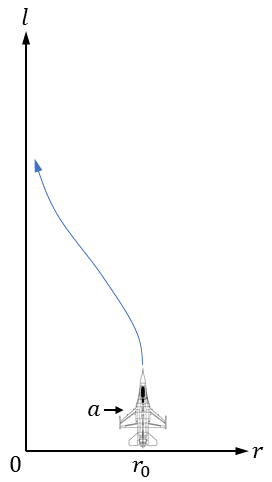


초기 위치가 $r_0$로 주어진 이 비행체는 $l$축 방향으로는 등속 운동하며, $r$축 방향으로 lateral acceleration $a$을 발생시킨다.

비행체의 운동과 무관한 $l$축을 생략한 뒤, free body diagram을 그리면 다음과 같다.

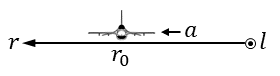

별도의 항력을 무시한다면, $r$축에서 비행체의 운동을 아래와 같이 기술할 수 있다.

$$
\begin{aligned}
\dot{r} &= v\\
\dot{v} &= a\\
y &= r
\end{aligned}
$$

시스템의 상태 $x$을 $\begin{bmatrix}r\\v\end{bmatrix}$으로 나타낸다면, ${\it i.e.}, x = \begin{bmatrix}r\\r\end{bmatrix}\dot{x} = \begin{bmatrix}\dot{r}\\\dot{v}\end{bmatrix}$, 상태방정식은 다음과 같다.

$$
\begin{bmatrix}\dot{r}\\\dot{v}\end{bmatrix} = \begin{bmatrix}0&1\\0&0\end{bmatrix}\begin{bmatrix}r\\v\end{bmatrix} + \begin{bmatrix}0\\1\end{bmatrix}a,
\quad y = \begin{bmatrix}1&0\end{bmatrix}\begin{bmatrix}r\\v\end{bmatrix}
$$

Euler method를 이용해 운동방정식을 이산화해 다시 기술하면,

$$
\begin{aligned}
r_{t+1} &= r_t + \Delta{t}v_t\\
v_{t+1} &= v_t + \Delta{t}a_t\\
y_{t} &= r_t\\
\end{aligned}
$$

이를 이용해 다음과 같은 이산화된 상태방정식을 얻을 수 있다.

$$
\begin{bmatrix}r_{t+1}\\v_{t+1}\end{bmatrix} = \begin{bmatrix}1&\Delta{t}\\0&1\end{bmatrix}\begin{bmatrix}r_t\\v_t\end{bmatrix} + \begin{bmatrix}0\\\Delta{t}\end{bmatrix}a_t,
\quad y_t = \begin{bmatrix}1&0\end{bmatrix}\begin{bmatrix}r_t\\v_t\end{bmatrix}
$$

상태 $x$을 이산화해 $x_t$로, 비행체가 발생시키는 가속도 $a_t$을 시스템의 입력 $u_t$, timestep $\Delta{t}$을 $1$이라 하면, 아래와 같다.

$$
x_{t+1}=\begin{bmatrix}1&1\\0&1\end{bmatrix}x_t+\begin{bmatrix}0\\1\end{bmatrix}u_t,\quad y_t=\begin{bmatrix}1&0\end{bmatrix}x_t
$$

비행체의 $r$축 초기위치는 $1$, 초기속도는 $0$이며, horizon size는 $20$으로 주어진다(${\it i.e.},~x_0=\begin{bmatrix}1\\0\end{bmatrix},~N=20$).

이제 cost function $J(U)$의 $Q, ~Q_f, ~R$을 다음과 같이 정의하자.

$$
Q=Q_f=C^TC,\quad R={\rho}I
$$

$J(U)$의 $x^TQx$은 $x^TC^TCx = \begin{bmatrix}r&v\end{bmatrix}\begin{bmatrix}1&0\\0&0\end{bmatrix}\begin{bmatrix}r\\v\end{bmatrix}=r^2$로 나타내어지므로, 비행체의 $r$축 위치를 $0$으로 수렴시키도록, 즉 비행체가 $l$축과 일치하도록 가속도 $a$을 발생시키며, $u^TRu$의 $\rho$을 이용해 가속도 $a$을 설계자가 임의로 조절할 수 있다. 예를 들어 timestep에 따른 $\rho$의 값들이 $\rho_1 = \dotsm = \rho_5 \rightarrow \infty, ~\rho_6 = \dotsm = \rho_N \rightarrow 0$으로 주어진다면, 이 시스템은 처음 5개의 timestep 동안 가속도 $a$을 사용하지 않을 것이고, 그 다음 timestep부터는 아무 제한 없이 $a$를 발생시킬 것이다.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# State Matrices
mtx_A = np.array([[1, 1], [0, 1]])
mtx_B = np.array([[0], [1]])
mtx_C = np.array([[1, 0]])

# Initial State
x_init = np.array([[1], [0]])

# Horizon Size
horz = 20

# Regulator
rho_1 = 0.3
rho_2 = 10

## **Attempt 1 : Least Square**

위 문제를 least square로 풀면 다음과 같다.

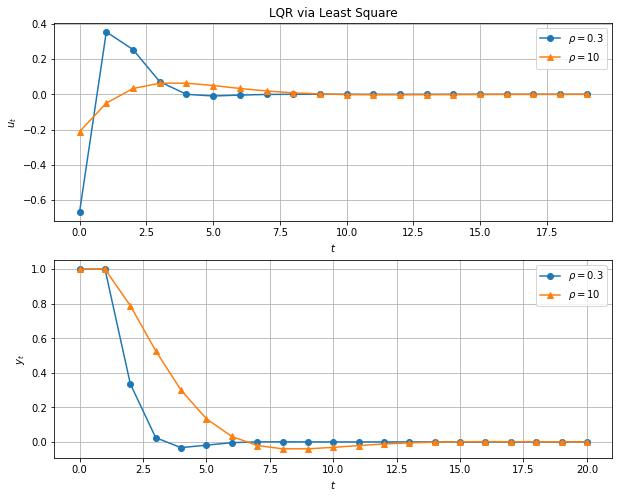

In [2]:
##### LQR via Least Square #####

# Matrix G
mtx_G_LS = np.zeros((2*(horz + 1), horz))
for i in range(0, mtx_G_LS.shape[0]):
  for j in range(0, mtx_G_LS.shape[1]):
    if i == 2*(j + 1):
      for k in range(0, horz - j):
        mtx_G_LS[i + k*2 : i + k*2 + 2, j : j + 1] = np.linalg.matrix_power(mtx_A, k)@mtx_B

# Matrix H
mtx_H_LS = np.zeros((2*(horz + 1), 2))
for i in range(0, mtx_H_LS.shape[0], 2):
  mtx_H_LS[i : i + 2, :] = np.linalg.matrix_power(mtx_A, int(i/2))

# Matrix Q
mtx_Q_LS = np.zeros((2*(horz + 1), 2*(horz + 1)))
for i in range(0, mtx_Q_LS.shape[0], 2):
  mtx_Q_LS[i : i + 2, i : i + 2] = mtx_C.T@mtx_C

# Matrix R
mtx_R1_LS = np.zeros((horz, horz))
mtx_R2_LS = np.zeros((horz, horz))
for i in range(0, mtx_R1_LS.shape[0]):
  mtx_R1_LS[i : i + 1, i : i + 1] = rho_1*np.eye(1)
  mtx_R2_LS[i : i + 1, i : i + 1] = rho_2*np.eye(1)

# Matrix Q(sqrt)
Q_LS_eigval, Q_LS_eigvec = np.linalg.eig(mtx_Q_LS)
mtx_Q_LS_sqrt = Q_LS_eigvec@(np.sqrt(Q_LS_eigval)*np.eye(Q_LS_eigval.shape[0]))@Q_LS_eigvec.T

# Matrix R(sqrt)
R1_LS_eigval, R1_LS_eigvec = np.linalg.eig(mtx_R1_LS)
R2_LS_eigval, R2_LS_eigvec = np.linalg.eig(mtx_R2_LS)
mtx_R1_LS_sqrt = R1_LS_eigvec@(np.sqrt(R1_LS_eigval)*np.eye(R1_LS_eigval.shape[0]))@R1_LS_eigvec.T
mtx_R2_LS_sqrt = R2_LS_eigvec@(np.sqrt(R2_LS_eigval)*np.eye(R2_LS_eigval.shape[0]))@R2_LS_eigvec.T

# Matrix A(tilde), b(tilde), C(tilde)
mtx_A_LS_tilde = mtx_Q_LS_sqrt@mtx_G_LS
mtx_b_LS_tilde = mtx_Q_LS_sqrt@mtx_H_LS@x_init
mtx_C1_LS_tilde = mtx_R1_LS_sqrt
mtx_C2_LS_tilde = mtx_R2_LS_sqrt

# Matrix A(bar), b(bar)
mtx_A1_LS_bar = np.concatenate((mtx_A_LS_tilde, mtx_C1_LS_tilde), axis = 0)
mtx_A2_LS_bar = np.concatenate((mtx_A_LS_tilde, mtx_C2_LS_tilde), axis = 0)
mtx_b_LS_bar = np.concatenate((mtx_b_LS_tilde, np.zeros((horz, 1))), axis = 0)

# Optimal Solution U*
U1_star_LS = -np.linalg.pinv(mtx_A1_LS_bar)@mtx_b_LS_bar
U2_star_LS = -np.linalg.pinv(mtx_A2_LS_bar)@mtx_b_LS_bar

# Optimal State X*
X1_star_LS = mtx_G_LS@U1_star_LS + mtx_H_LS@x_init
X2_star_LS = mtx_G_LS@U2_star_LS + mtx_H_LS@x_init

# Optimal Output Y*
Y1_star_LS = np.zeros(horz + 1)
Y2_star_LS = np.zeros(horz + 1)
for i in range(0, (horz + 1)*2, 2):
  Y1_star_LS[int(i/2)] = X1_star_LS[i]
  Y2_star_LS[int(i/2)] = X2_star_LS[i]

# Plot Least Square Result
plt.figure(figsize=(10,8))
plt.subplot(211)
t1 = np.arange(0, U1_star_LS.shape[0], 1)
plt.plot(t1, U1_star_LS, 'o-', label = r'$\rho = 0.3$')
plt.plot(t1, U2_star_LS, '^-', label = r'$\rho = 10$')
plt.xlabel('$t$')
plt.ylabel('$u_t$')
plt.legend()
plt.grid()
plt.title('LQR via Least Square')
plt.subplot(212)
t2 = np.arange(0, Y1_star_LS.shape[0], 1)
plt.plot(t2, Y1_star_LS, 'o-', label = r'$\rho = 0.3$')
plt.plot(t2, Y2_star_LS, '^-', label = r'$\rho = 10$')
plt.xlabel('$t$')
plt.ylabel('$y_t$')
plt.legend()
plt.grid()
plt.show()

## **Attempt 2 : Dynamic Progrmming**

Least square로 풀어본 기존 문제를 dynamic programming으로 풀어 동일한 결과가 나타나는지 확인할 것이다.

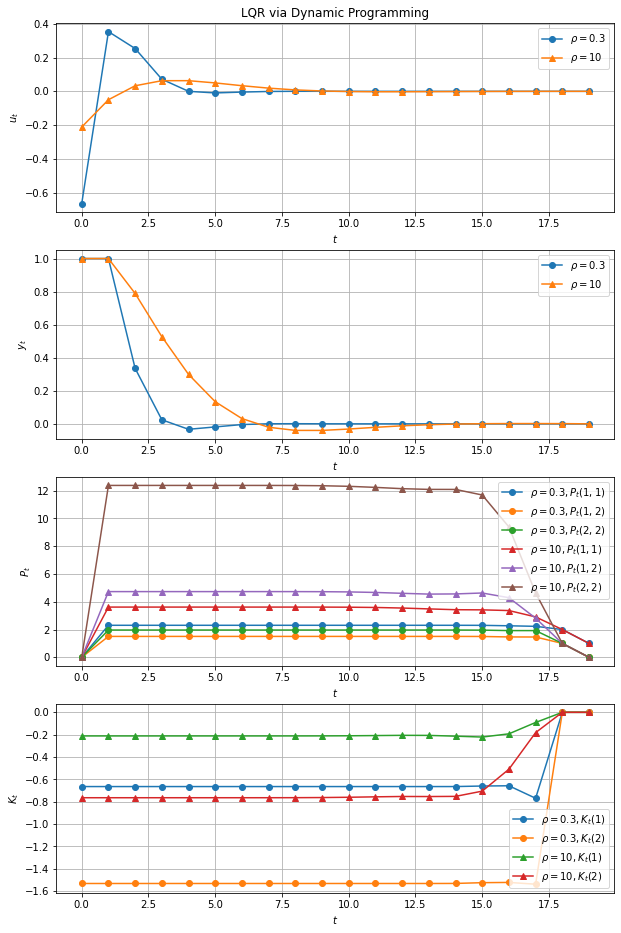

In [3]:
##### LQR via Dynamic Programming #####

# Setting Up Variables
mtx_Q_DP = mtx_C.T@mtx_C
mtx_R1_DP = rho_1*np.eye(1)
mtx_R2_DP = rho_2*np.eye(1)
mtx_P1_DP = np.zeros((horz, mtx_C.shape[1] , mtx_C.shape[1]))
mtx_P2_DP = np.zeros((horz, mtx_C.shape[1] , mtx_C.shape[1]))
gain_K1_DP = np.zeros((horz, 2))
gain_K2_DP = np.zeros((horz, 2))
U1_star_DP = np.zeros(horz)
U2_star_DP = np.zeros(horz)
state_X1_DP = x_init
state_X2_DP = x_init
Y1_star_DP = np.zeros(horz)
Y2_star_DP = np.zeros(horz)

# Step 1
mtx_P1_DP[horz - 1, :, :] = mtx_Q_DP
mtx_P2_DP[horz - 1, :, :] = mtx_Q_DP

# Step 2
for i in range(horz - 2, 0, -1):
  mtx_P1_DP[i, :, :] = mtx_Q_DP + mtx_A.T@mtx_P1_DP[i + 1, :, :]@mtx_A - mtx_A.T@mtx_P1_DP[i + 1, :, :]@mtx_B@np.linalg.inv(mtx_R1_DP + mtx_B.T@mtx_P1_DP[i + 1, :, :]@mtx_B)@mtx_B.T@mtx_P1_DP[i + 1, :, :]@mtx_A
  mtx_P2_DP[i, :, :] = mtx_Q_DP + mtx_A.T@mtx_P2_DP[i + 1, :, :]@mtx_A - mtx_A.T@mtx_P2_DP[i + 1, :, :]@mtx_B@np.linalg.inv(mtx_R2_DP + mtx_B.T@mtx_P2_DP[i + 1, :, :]@mtx_B)@mtx_B.T@mtx_P2_DP[i + 1, :, :]@mtx_A

# Step 3, 4
for i in range(0, horz - 1):
  gain_K1_DP[i, :] = -np.linalg.inv(mtx_R1_DP + mtx_B.T@mtx_P1_DP[i + 1, :, :]@mtx_B)@mtx_B.T@mtx_P1_DP[i + 1, :, :]@mtx_A
  gain_K2_DP[i, :] = -np.linalg.inv(mtx_R2_DP + mtx_B.T@mtx_P2_DP[i + 1, :, :]@mtx_B)@mtx_B.T@mtx_P2_DP[i + 1, :, :]@mtx_A
  U1_star_DP[i] = gain_K1_DP[i, :]@state_X1_DP
  U2_star_DP[i] = gain_K2_DP[i, :]@state_X2_DP
  Y1_star_DP[i] = mtx_C@state_X1_DP
  Y2_star_DP[i] = mtx_C@state_X2_DP
  state_X1_DP = mtx_A@state_X1_DP + mtx_B*U1_star_DP[i]
  state_X2_DP = mtx_A@state_X2_DP + mtx_B*U2_star_DP[i]

# Plot Dynamic Programming Result
plt.figure(figsize=(10,16))
plt.subplot(411)
t1 = np.arange(0, U1_star_DP.shape[0], 1)
plt.plot(t1, U1_star_DP, 'o-', label = r'$\rho = 0.3$')
plt.plot(t1, U2_star_DP, '^-', label = r'$\rho = 10$')
plt.xlabel('$t$')
plt.ylabel('$u_t$')
plt.legend()
plt.grid()
plt.title('LQR via Dynamic Programming')
plt.subplot(412)
t2 = np.arange(0, Y1_star_DP.shape[0], 1)
plt.plot(t2, Y1_star_DP, 'o-', label = r'$\rho = 0.3$')
plt.plot(t2, Y2_star_DP, '^-', label = r'$\rho = 10$')
plt.xlabel('$t$')
plt.ylabel('$y_t$')
plt.legend()
plt.grid()
plt.subplot(413)
t3 = np.arange(0, mtx_P1_DP.shape[0], 1)
plt.plot(t3, mtx_P1_DP[:, 0, 0], 'o-', label = r'$\rho = 0.3, P_t(1, 1)$')
plt.plot(t3, mtx_P1_DP[:, 0, 1], 'o-', label = r'$\rho = 0.3, P_t(1, 2)$')
plt.plot(t3, mtx_P1_DP[:, 1, 1], 'o-', label = r'$\rho = 0.3, P_t(2, 2)$')
plt.plot(t3, mtx_P2_DP[:, 0, 0], '^-', label = r'$\rho = 10, P_t(1, 1)$')
plt.plot(t3, mtx_P2_DP[:, 0, 1], '^-', label = r'$\rho = 10, P_t(1, 2)$')
plt.plot(t3, mtx_P2_DP[:, 1, 1], '^-', label = r'$\rho = 10, P_t(2, 2)$')
plt.xlabel('$t$')
plt.ylabel('$P_t$')
plt.legend()
plt.grid()
plt.subplot(414)
t4 = np.arange(0, gain_K1_DP.shape[0], 1)
plt.plot(t4, gain_K1_DP[:, 0], 'o-', label = r'$\rho = 0.3, K_t(1)$')
plt.plot(t4, gain_K1_DP[:, 1], 'o-', label = r'$\rho = 0.3, K_t(2)$')
plt.plot(t4, gain_K2_DP[:, 0], '^-', label = r'$\rho = 10, K_t(1)$')
plt.plot(t4, gain_K2_DP[:, 1], '^-', label = r'$\rho = 10, K_t(2)$')
plt.xlabel('$t$')
plt.ylabel('$K_t$')
plt.legend()
plt.grid()
plt.show()

## **System with Noise**

Least square와 dynamic programming 중 어떤 방법이 noise에 대해 더 robust한지 알아보기 위해, 상태변수 $x$에 noise를 추가한 뒤 그 결과를 비교할 것이다. 변위 $r$, 속도 $v$에 가해진 noise $n^r_t, ~n^v_t$의 평균 $0$과 표준편차 $0.1$을 따르는 정규분포로 설정하였다.

$$
x_{t+1}=\begin{bmatrix}1&1\\0&1\end{bmatrix}x_t+\begin{bmatrix}0\\1\end{bmatrix}u_t+\begin{bmatrix}1&0\\0&1\end{bmatrix}\begin{bmatrix}n^r_t\\n^v_t\end{bmatrix},\quad y_t=\begin{bmatrix}1&0\end{bmatrix}x_t
$$


In [4]:
##### Noise #####

noise_mean = 0
noise_stdev = 0.1
noise_r = noise_stdev*np.random.randn(horz) + noise_mean
noise_v = noise_stdev*np.random.randn(horz) + noise_mean

### **Least Square with Noise**

Noise가 포함된 형태의 block Toeplitx matrix를 새롭게 정의하자.

$$
X_\text{noise}=GU+Hx_0+WN
$$

여기서 $W,~ N$은 다음과 같다.

$$
W=\begin{bmatrix}0&0&\dotsm&0\\I&0&\dotsm&0\\A&I&\dotsm&0\\\vdots&\ddots&\ddots&\vdots\\A^{N-1}&\dotsm&A&I\end{bmatrix},
~N=\begin{bmatrix}n^r_0\\n^v_0\\\vdots\\n^r_{N-1}\\n^v_{N-1}\end{bmatrix}
$$

$J(U)$에 $X_\text{noise}$을 대입해 정리하면 아래와 같다.

\begin{aligned}
J(U)&=\left\lVert{\tilde{A}U+\tilde{b}_\text{noise}}\right\rVert_2^2+\left\lVert{\tilde{C}U}\right\rVert_2^2\\
&=\left\lVert\begin{bmatrix}{\tilde{A}U+\tilde{b}_\text{noise}}\\\tilde{C}U\end{bmatrix}\right\rVert_2^2\\
&=\left\lVert\begin{bmatrix}\tilde{A}\\\tilde{C}\end{bmatrix}U+\begin{bmatrix}\tilde{b}_\text{noise}\\0\end{bmatrix}\right\rVert_2^2\\
&=\left\lVert\bar{A}U+\bar{b}_\text{noise}\right\rVert_2^2\\
\end{aligned}

여기서

$$
\begin{aligned}
\tilde{b}_\text{noise}&=\text{diag}(Q^\frac{1}{2}, \dotsm , Q_f^\frac{1}{2})(Hx_0+WN)\\
&=\begin{bmatrix}Q^\frac{1}{2}\\Q^\frac{1}{2}A\\\vdots\\Q_f^\frac{1}{2}A^N\end{bmatrix}x_0+\begin{bmatrix}0&0&\dotsm&0\\Q^\frac{1}{2}&0&\dotsm&0\\Q^\frac{1}{2}A&Q^\frac{1}{2}&\dotsm&0\\\vdots&\ddots&\ddots&\vdots\\Q_f^\frac{1}{2}A^{N-1}&\dotsm&Q_f^\frac{1}{2}A&Q_f^\frac{1}{2}\end{bmatrix}\begin{bmatrix}n^r_0\\n^v_0\\\vdots\\n^r_{N-1}\\n^v_{N-1}\end{bmatrix},\\
\bar{b}_\text{noise}&=\begin{bmatrix}\tilde{b}_\text{noise}\\\tilde{0}\end{bmatrix}
\end{aligned}
$$

결과적으로, noise가 포함된 시스템의 least square solution은 다음과 같이 주어진다.

$$
\begin{aligned}
U^*_\text{noise} &= -(\bar{A}^T\bar{A})^{-1}\bar{A}^T\bar{b}_\text{noise}\\
V^*_\text{noise} &= \bar{b}_\text{noise}^T\bar{b}_\text{noise} - \bar{b}_\text{noise}^T\bar{A}(\bar{A}^T\bar{A})^{-1}\bar{A}^T\bar{b}_\text{noise}
\end{aligned}
$$


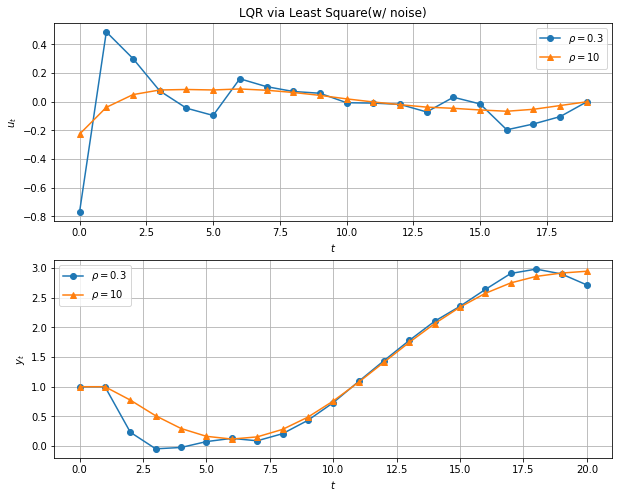

In [5]:
##### Least Square with Noise #####

# Matrix N
mtx_N_LS = np.zeros((horz*2, 1))
for i in range(0, horz - 1):
  mtx_N_LS[2*i, 0] = noise_r[i]
  mtx_N_LS[2*i + 1, 0] = noise_v[i]

# Matrix W
mtx_W_LS = np.zeros(((horz + 1)*2, horz*2))
for i in range(0, mtx_W_LS.shape[0], 2):
  for j in range(0, mtx_W_LS.shape[1]):
    if i == j + 2:
      for k in range(0, horz - int(j/2)):
        mtx_W_LS[i + k*2 : i + k*2 + 2, j : j + 2] = np.linalg.matrix_power(mtx_A, k)@np.eye(2)

# Matrix b(tilde) with noise
mtx_b_LS_tilde_noise = mtx_Q_LS_sqrt@(mtx_H_LS@x_init + mtx_W_LS@mtx_N_LS)

# Matrix b(bar) with noise
mtx_b_LS_bar_noise = np.concatenate((mtx_b_LS_tilde_noise, np.zeros((horz, 1))), axis = 0)

# Optimal Solution U* with noise
U1_star_LS_noise = -np.linalg.pinv(mtx_A1_LS_bar)@mtx_b_LS_bar_noise
U2_star_LS_noise = -np.linalg.pinv(mtx_A2_LS_bar)@mtx_b_LS_bar_noise

# Optimal State X* with noise
X1_star_LS_noise = mtx_G_LS@U1_star_LS_noise + mtx_H_LS@x_init
X2_star_LS_noise = mtx_G_LS@U2_star_LS_noise + mtx_H_LS@x_init

# Optimal Output Y* with noise
Y1_star_LS_noise = np.zeros(horz + 1)
Y2_star_LS_noise = np.zeros(horz + 1)
for i in range(0, (horz + 1)*2, 2):
  Y1_star_LS_noise[int(i/2)] = X1_star_LS_noise[i]
  Y2_star_LS_noise[int(i/2)] = X2_star_LS_noise[i]

# Plot Least Square Result
plt.figure(figsize=(10,8))
plt.subplot(211)
t1 = np.arange(0, U1_star_LS_noise.shape[0], 1)
plt.plot(t1, U1_star_LS_noise, 'o-', label = r'$\rho = 0.3$')
plt.plot(t1, U2_star_LS_noise, '^-', label = r'$\rho = 10$')
plt.xlabel('$t$')
plt.ylabel('$u_t$')
plt.legend()
plt.grid()
plt.title('LQR via Least Square(w/ noise)')
plt.subplot(212)
t2 = np.arange(0, Y1_star_LS_noise.shape[0], 1)
plt.plot(t2, Y1_star_LS_noise, 'o-', label = r'$\rho = 0.3$')
plt.plot(t2, Y2_star_LS_noise, '^-', label = r'$\rho = 10$')
plt.xlabel('$t$')
plt.ylabel('$y_t$')
plt.legend()
plt.grid()
plt.show()

### **Dynamic Programming with Noise** ###

Dynamic programming에서 noise의 추가 유무와 관계없이 $P_t,~ K_t$은 일정하므로, 의사코드의 Step 4만 다음과 같이 변형된다.

4.   $\text{for}~t=N, \dotsm, 1 : \\
u_t^* \leftarrow K_tx^\text{noise}_t$


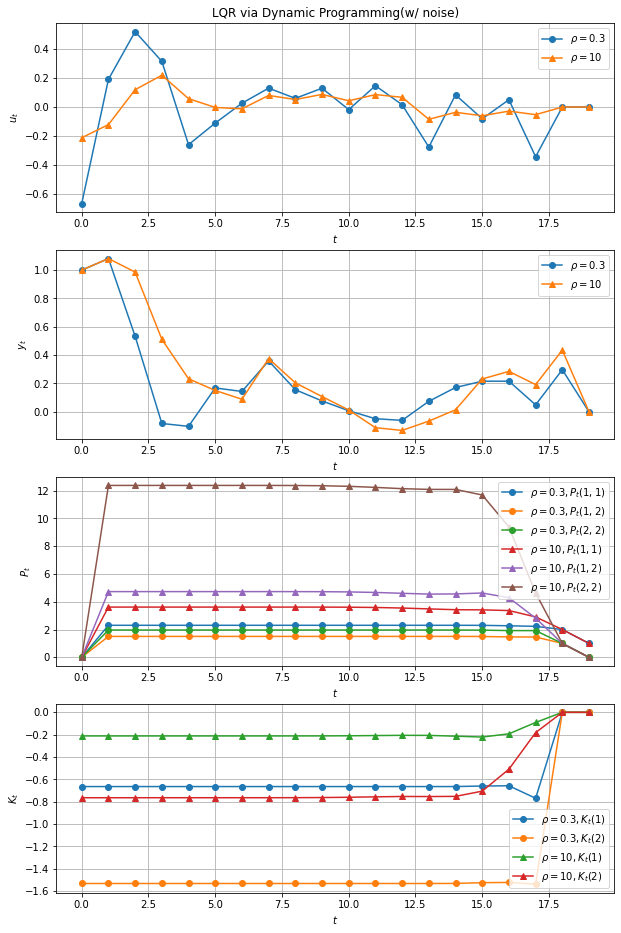

In [6]:
##### Dynamic Programming with Noise #####

# Setting Up Variables
U1_star_DP_noise = np.zeros(horz)
U2_star_DP_noise = np.zeros(horz)
state_X1_DP_noise = x_init
state_X2_DP_noise = x_init
Y1_star_DP_noise = np.zeros(horz)
Y2_star_DP_noise = np.zeros(horz)

# Step 4
for i in range(0, horz - 1):
  U1_star_DP_noise[i] = gain_K1_DP[i, :]@state_X1_DP_noise
  U2_star_DP_noise[i] = gain_K2_DP[i, :]@state_X2_DP_noise
  Y1_star_DP_noise[i] = mtx_C@state_X1_DP_noise
  Y2_star_DP_noise[i] = mtx_C@state_X2_DP_noise
  state_X1_DP_noise = mtx_A@state_X1_DP_noise + mtx_B*U1_star_DP_noise[i] + np.array([[noise_r[i]], [noise_v[i]]])
  state_X2_DP_noise = mtx_A@state_X2_DP_noise + mtx_B*U2_star_DP_noise[i] + np.array([[noise_r[i]], [noise_v[i]]])

# Plot Dynamic Programming Result
plt.figure(figsize=(10,16))
plt.subplot(411)
t1 = np.arange(0, U1_star_DP_noise.shape[0], 1)
plt.plot(t1, U1_star_DP_noise, 'o-', label = r'$\rho = 0.3$')
plt.plot(t1, U2_star_DP_noise, '^-', label = r'$\rho = 10$')
plt.xlabel('$t$')
plt.ylabel('$u_t$')
plt.legend()
plt.grid()
plt.title('LQR via Dynamic Programming(w/ noise)')
plt.subplot(412)
t2 = np.arange(0, Y1_star_DP_noise.shape[0], 1)
plt.plot(t2, Y1_star_DP_noise, 'o-', label = r'$\rho = 0.3$')
plt.plot(t2, Y2_star_DP_noise, '^-', label = r'$\rho = 10$')
plt.xlabel('$t$')
plt.ylabel('$y_t$')
plt.legend()
plt.grid()
plt.subplot(413)
t3 = np.arange(0, mtx_P1_DP.shape[0], 1)
plt.plot(t3, mtx_P1_DP[:, 0, 0], 'o-', label = r'$\rho = 0.3, P_t(1, 1)$')
plt.plot(t3, mtx_P1_DP[:, 0, 1], 'o-', label = r'$\rho = 0.3, P_t(1, 2)$')
plt.plot(t3, mtx_P1_DP[:, 1, 1], 'o-', label = r'$\rho = 0.3, P_t(2, 2)$')
plt.plot(t3, mtx_P2_DP[:, 0, 0], '^-', label = r'$\rho = 10, P_t(1, 1)$')
plt.plot(t3, mtx_P2_DP[:, 0, 1], '^-', label = r'$\rho = 10, P_t(1, 2)$')
plt.plot(t3, mtx_P2_DP[:, 1, 1], '^-', label = r'$\rho = 10, P_t(2, 2)$')
plt.xlabel('$t$')
plt.ylabel('$P_t$')
plt.legend()
plt.grid()
plt.subplot(414)
t4 = np.arange(0, gain_K1_DP.shape[0], 1)
plt.plot(t4, gain_K1_DP[:, 0], 'o-', label = r'$\rho = 0.3, K_t(1)$')
plt.plot(t4, gain_K1_DP[:, 1], 'o-', label = r'$\rho = 0.3, K_t(2)$')
plt.plot(t4, gain_K2_DP[:, 0], '^-', label = r'$\rho = 10, K_t(1)$')
plt.plot(t4, gain_K2_DP[:, 1], '^-', label = r'$\rho = 10, K_t(2)$')
plt.xlabel('$t$')
plt.ylabel('$K_t$')
plt.legend()
plt.grid()
plt.show()

## **Proportional Navigation Guidance**

Value function의 $Q,~ Q_f$을 조절해 마지막 timestep에서 변위 $r$을 $0$으로 수렴시키는 경우를 고려하자. 이를 위해 $Q$은 영행렬, $Q_f$의 첫 번째 원소를 아주 큰 값으로 설정한다. 이러한 경우의 guidance solution은 proportional navigation guidance라는 이름으로 알려져 있다.

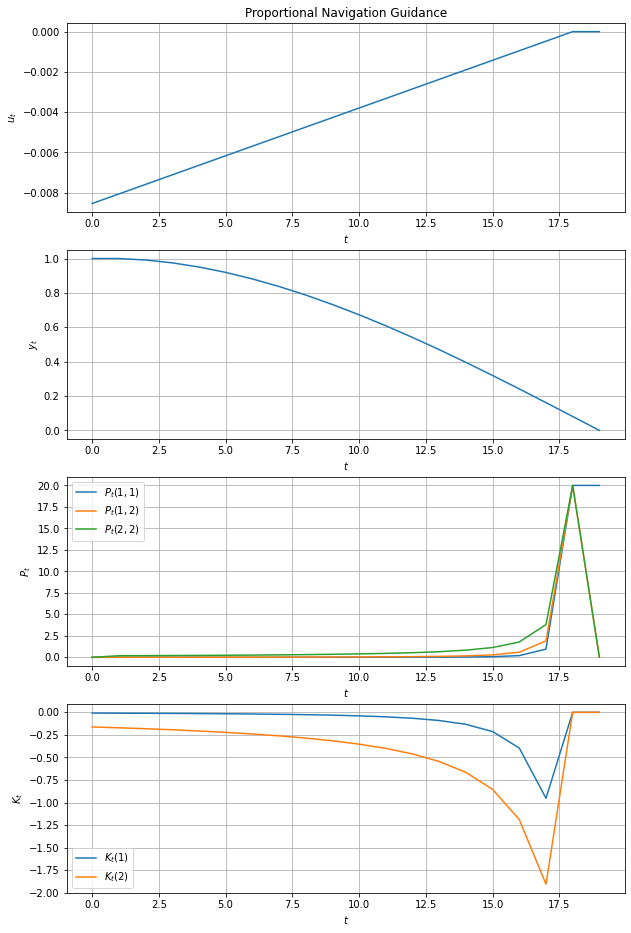

In [7]:
##### Proportional Navigation Guidance #####

# Setting Up Variables
rho = 1
qf_11 = 2e1
qf_22 = 0
mtx_Q_DP = np.array([[0, 0], [0, 0]])
mtx_Qf_DP = np.array([[qf_11, 0], [0, qf_22]])
mtx_R_DP = rho*np.eye(1)
mtx_P_DP = np.zeros((horz, mtx_C.shape[1] , mtx_C.shape[1]))
gain_K_DP = np.zeros((horz, 2))
U_star_DP = np.zeros(horz)
state_X_DP = x_init
Y_star_DP = np.zeros(horz)

# Step 1
mtx_P_DP[horz - 1, :, :] = mtx_Qf_DP

# Step 2
for i in range(horz - 2, 0, -1):
  mtx_P_DP[i, :, :] = mtx_Q_DP + mtx_A.T@mtx_P_DP[i + 1, :, :]@mtx_A - mtx_A.T@mtx_P_DP[i + 1, :, :]@mtx_B@np.linalg.inv(mtx_R_DP + mtx_B.T@mtx_P_DP[i + 1, :, :]@mtx_B)@mtx_B.T@mtx_P_DP[i + 1, :, :]@mtx_A

# Step 3, 4
for i in range(0, horz - 1):
  gain_K_DP[i, :] = -np.linalg.inv(mtx_R_DP + mtx_B.T@mtx_P_DP[i + 1, :, :]@mtx_B)@mtx_B.T@mtx_P_DP[i + 1, :, :]@mtx_A
  U_star_DP[i] = gain_K_DP[i, :]@state_X_DP
  Y_star_DP[i] = mtx_C@state_X_DP
  state_X_DP = mtx_A@state_X_DP + mtx_B*U_star_DP[i]

# Plot Proportional Navigation Result
plt.figure(figsize=(10,16))
plt.subplot(411)
t1 = np.arange(0, U_star_DP.shape[0], 1)
plt.plot(t1, U_star_DP)
plt.xlabel('$t$')
plt.ylabel('$u_t$')
plt.grid()
plt.title('Proportional Navigation Guidance')
plt.subplot(412)
t2 = np.arange(0, Y_star_DP.shape[0], 1)
plt.plot(t2, Y_star_DP)
plt.xlabel('$t$')
plt.ylabel('$y_t$')
plt.grid()
plt.subplot(413)
t3 = np.arange(0, mtx_P_DP.shape[0], 1)
plt.plot(t3, mtx_P_DP[:, 0, 0], label = r'$P_t(1, 1)$')
plt.plot(t3, mtx_P_DP[:, 0, 1], label = r'$P_t(1, 2)$')
plt.plot(t3, mtx_P_DP[:, 1, 1], label = r'$P_t(2, 2)$')
plt.xlabel('$t$')
plt.ylabel('$P_t$')
plt.legend()
plt.grid()
plt.subplot(414)
t4 = np.arange(0, gain_K_DP.shape[0], 1)
plt.plot(t4, gain_K_DP[:, 0], label = r'$K_t(1)$')
plt.plot(t4, gain_K_DP[:, 1], label = r'$K_t(2)$')
plt.xlabel('$t$')
plt.ylabel('$K_t$')
plt.legend()
plt.grid()
plt.show()

## **Impact Angle Guidance**

Proportional navigation guidance에 이어, 마지막 timestep에서 $r,~ v$ 모두 $0$으로 수렴시키는 경우를 고려하자. 이를 위해 $Q$은 영행렬, $Q_f$의 대각성분을 아주 큰 값으로 설정한다. 이러한 guidance solution은 마지막 시점에서의 비행체의 속도벡터를 제어할 수 있으므로, ${\it i.e.}~$flight path angle과 heading angle을 제어 가능하므로, impact angle guidance라 한다.

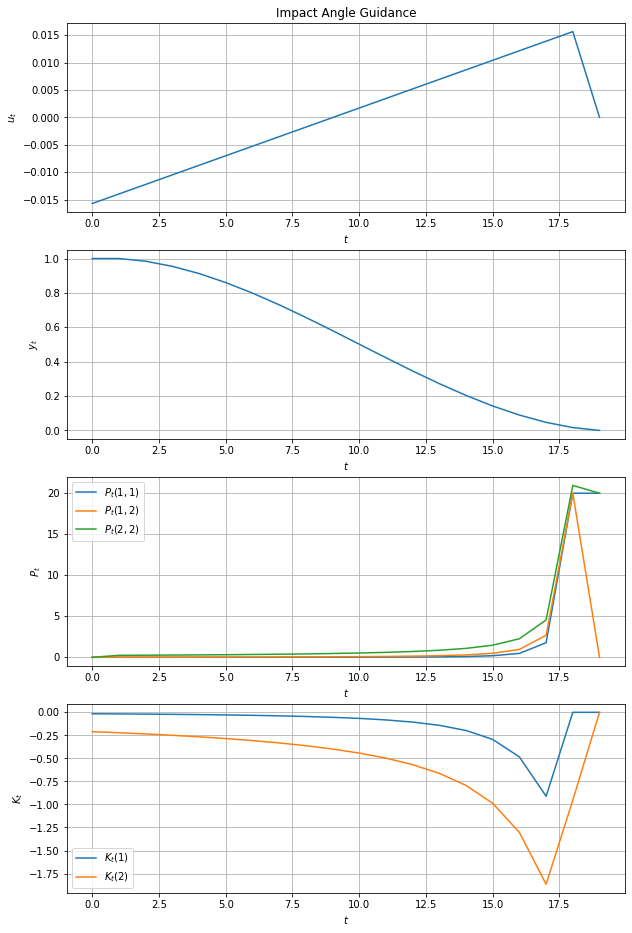

In [8]:
##### Impact Angle Guidance #####

# Setting Up Variables
rho = 1
qf_11 = 2e1
qf_22 = 2e1
mtx_Qf_DP = np.array([[qf_11, 0], [0, qf_22]])
mtx_R_DP = rho*np.eye(1)
mtx_P_DP = np.zeros((horz, mtx_C.shape[1] , mtx_C.shape[1]))
gain_K_DP = np.zeros((horz, 2))
U_star_DP = np.zeros(horz)
state_X_DP = x_init
Y_star_DP = np.zeros(horz)

# Step 1
mtx_P_DP[horz - 1, :, :] = mtx_Qf_DP

# Step 2
for i in range(horz - 2, 0, -1):
  mtx_P_DP[i, :, :] = mtx_Q_DP + mtx_A.T@mtx_P_DP[i + 1, :, :]@mtx_A - mtx_A.T@mtx_P_DP[i + 1, :, :]@mtx_B@np.linalg.inv(mtx_R_DP + mtx_B.T@mtx_P_DP[i + 1, :, :]@mtx_B)@mtx_B.T@mtx_P_DP[i + 1, :, :]@mtx_A

# Step 3, 4
for i in range(0, horz - 1):
  gain_K_DP[i, :] = -np.linalg.inv(mtx_R_DP + mtx_B.T@mtx_P_DP[i + 1, :, :]@mtx_B)@mtx_B.T@mtx_P_DP[i + 1, :, :]@mtx_A
  U_star_DP[i] = gain_K_DP[i, :]@state_X_DP
  Y_star_DP[i] = mtx_C@state_X_DP
  state_X_DP = mtx_A@state_X_DP + mtx_B*U_star_DP[i]

# Plot Impact Angle Guidance Result
plt.figure(figsize=(10,16))
plt.subplot(411)
t1 = np.arange(0, U_star_DP.shape[0], 1)
plt.plot(t1, U_star_DP)
plt.xlabel('$t$')
plt.ylabel('$u_t$')
plt.grid()
plt.title('Impact Angle Guidance')
plt.subplot(412)
t2 = np.arange(0, Y_star_DP.shape[0], 1)
plt.plot(t2, Y_star_DP)
plt.xlabel('$t$')
plt.ylabel('$y_t$')
plt.grid()
plt.subplot(413)
t3 = np.arange(0, mtx_P_DP.shape[0], 1)
plt.plot(t3, mtx_P_DP[:, 0, 0], label = r'$P_t(1, 1)$')
plt.plot(t3, mtx_P_DP[:, 0, 1], label = r'$P_t(1, 2)$')
plt.plot(t3, mtx_P_DP[:, 1, 1], label = r'$P_t(2, 2)$')
plt.xlabel('$t$')
plt.ylabel('$P_t$')
plt.legend()
plt.grid()
plt.subplot(414)
t4 = np.arange(0, gain_K_DP.shape[0], 1)
plt.plot(t4, gain_K_DP[:, 0], label = r'$K_t(1)$')
plt.plot(t4, gain_K_DP[:, 1], label = r'$K_t(2)$')
plt.xlabel('$t$')
plt.ylabel('$K_t$')
plt.legend()
plt.grid()
plt.show()

## **Extra : Angle of Attack Control**

비행체의 변위, 속도에 이어 마지막 timestep에서의 가속도, 즉 제어 입력 역시 $0$으로 수렴시키는는 guidance solution을 도출해 보자. 비행체의 기동 가속도는 비행체가 취하는 자세로 인해 발생되며, 이는 비행체의 받음각과 아주 밀접한 관련이 있다. 마지막 순간 기동가속도를 최소화하도록 기동한다면 비행체는 별도의 자세 변화 없이 $l$축과 일치할 것이다.

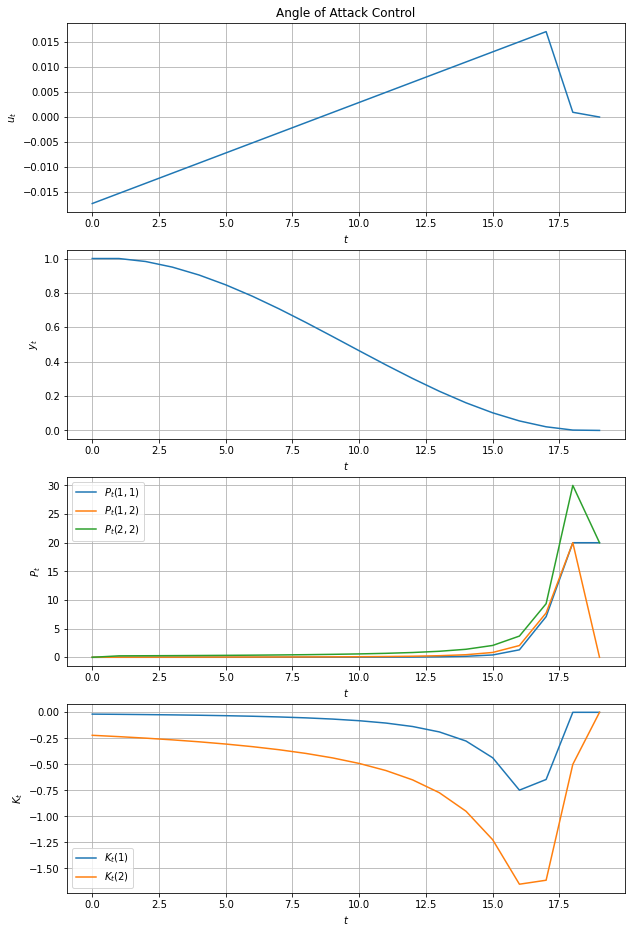

In [9]:
##### Angle of Attack Control #####

# Setting Up Variables
rho = 1
rho_A0A = 2e1
qf_11 = 2e1
qf_22 = 2e1
mtx_Q_DP = np.array([[0, 0], [0, 0]])
mtx_Qf_DP = np.array([[qf_11, 0], [0, qf_22]])
mtx_R_DP = rho*np.eye(1)
mtx_Rf_DP = rho_A0A*np.eye(1)
mtx_P_DP = np.zeros((horz, mtx_C.shape[1] , mtx_C.shape[1]))
gain_K_DP = np.zeros((horz, 2))
U_star_DP = np.zeros(horz)
state_X_DP = x_init
Y_star_DP = np.zeros(horz)

# Step 1
mtx_P_DP[horz - 1, :, :] = mtx_Qf_DP

# Step 2
for i in range(horz - 2, 0, -1):
  if i == horz - 2:
    mtx_P_DP[i, :, :] = mtx_Q_DP + mtx_A.T@mtx_P_DP[i + 1, :, :]@mtx_A - mtx_A.T@mtx_P_DP[i + 1, :, :]@mtx_B@np.linalg.inv(mtx_Rf_DP + mtx_B.T@mtx_P_DP[i + 1, :, :]@mtx_B)@mtx_B.T@mtx_P_DP[i + 1, :, :]@mtx_A
  else:
    mtx_P_DP[i, :, :] = mtx_Q_DP + mtx_A.T@mtx_P_DP[i + 1, :, :]@mtx_A - mtx_A.T@mtx_P_DP[i + 1, :, :]@mtx_B@np.linalg.inv(mtx_R_DP + mtx_B.T@mtx_P_DP[i + 1, :, :]@mtx_B)@mtx_B.T@mtx_P_DP[i + 1, :, :]@mtx_A

# Step 3, 4
for i in range(0, horz - 1):
  if i == horz - 2:
    gain_K_DP[i, :] = -np.linalg.inv(mtx_Rf_DP + mtx_B.T@mtx_P_DP[i + 1, :, :]@mtx_B)@mtx_B.T@mtx_P_DP[i + 1, :, :]@mtx_A
  else:
    gain_K_DP[i, :] = -np.linalg.inv(mtx_R_DP + mtx_B.T@mtx_P_DP[i + 1, :, :]@mtx_B)@mtx_B.T@mtx_P_DP[i + 1, :, :]@mtx_A
  U_star_DP[i] = gain_K_DP[i, :]@state_X_DP
  Y_star_DP[i] = mtx_C@state_X_DP
  state_X_DP = mtx_A@state_X_DP + mtx_B*U_star_DP[i]

# Plot AOA Control Result
plt.figure(figsize=(10,16))
plt.subplot(411)
t1 = np.arange(0, U_star_DP.shape[0], 1)
plt.plot(t1, U_star_DP)
plt.xlabel('$t$')
plt.ylabel('$u_t$')
plt.grid()
plt.title('Angle of Attack Control')
plt.subplot(412)
t2 = np.arange(0, Y_star_DP.shape[0], 1)
plt.plot(t2, Y_star_DP)
plt.xlabel('$t$')
plt.ylabel('$y_t$')
plt.grid()
plt.subplot(413)
t3 = np.arange(0, mtx_P_DP.shape[0], 1)
plt.plot(t3, mtx_P_DP[:, 0, 0], label = r'$P_t(1, 1)$')
plt.plot(t3, mtx_P_DP[:, 0, 1], label = r'$P_t(1, 2)$')
plt.plot(t3, mtx_P_DP[:, 1, 1], label = r'$P_t(2, 2)$')
plt.xlabel('$t$')
plt.ylabel('$P_t$')
plt.legend()
plt.grid()
plt.subplot(414)
t4 = np.arange(0, gain_K_DP.shape[0], 1)
plt.plot(t4, gain_K_DP[:, 0], label = r'$K_t(1)$')
plt.plot(t4, gain_K_DP[:, 1], label = r'$K_t(2)$')
plt.xlabel('$t$')
plt.ylabel('$K_t$')
plt.legend()
plt.grid()
plt.show()